  # The Battle of the Neighborhoods -Part_1- Week 2


## New York City Data Acquisition, Cleaning and Exploration


In [449]:
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
#%matplotlib inline
plt.style.use('ggplot')
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import wget
import json # library to handle JSON files
from bs4 import BeautifulSoup
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 1- Web scrapping of Population, Gross Domestic Produc, Land area, and Population Density data from wikipedia page using BeautifulSoup.

#### Python BeautifulSoup Library is used for web scraping of table from the Wikipedia. The title of the webpage is printed to check if the page has been scraped successfully or not.

#### This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Demographics_of_New_York_City

In [450]:
source = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
Boroughs_New_York_City = str(soup.table)
#display_html(tab,raw=True)

<title>Demographics of New York City - Wikipedia</title>


In [451]:
New_York_df = pd.read_html(Boroughs_New_York_City)
New_York_df=New_York_df[0]
New_York_df.head(10)

New York City's five boroughsvte  \
                                       Jurisdiction   
                                            Borough   
0                                         The Bronx   
1                                          Brooklyn   
2                                         Manhattan   
3                                            Queens   
4                                     Staten Island   
5                                  City of New York   
6                                 State of New York   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                             County   
0                                             Bronx   
1                                             Kings   
2                                          New York   
3                                            Queens   
4                                          Richmond   
5                                  City of New York   
6                                 State of New York   
7  Sources:[14] and see individual borough articles   

                                                     \
                                         Population   
                                Estimate (2019)[12]   
0                                           1418207   
1                                           2559903   
2                                           1628706   
3                                           2253858   
4                                            476143   
5                                           8336817   
6                                          19453561   
7  Sources:[14] and see individual borough articles   

                                                     \
                             Gross Domestic Product   
                                  billions(US$)[13]   
0                                            42.695   
1                                            91.559   
2                                           600.244   
3                                            93.310   
4                                            14.514   
5                                           842.343   
6                                          1731.910   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                    per capita(US$)   
0                                             30100   
1                                             35800   
2                                            368500   
3                                             41400   
4                                             30500   
5                                            101000   
6                                             89000   
7  Sources:[14] and see individual borough articles   

                                                     \
                                          Land area   
                                       square miles   
0                                             42.10   
1                                             70.82   
2                                             22.83   
3                                            108.53   
4                                             58.37   
5                                            302.64   
6                                             47214   
7  Sources:[14] and see individual borough articles   

                                                     \
                                                      
                                           squarekm   
0                                            109.04   
1                                            183.42   
2                                             59.13   
3                                            281.09  

## 1-1 data wrangling

In [452]:
New_York_df.columns =['Borough','County', 'Population', 'Gross Domestic Product billions/US$', 'Gross Domestic Product per capita(US$)',  'Land area square miles', 'Land area square km', 'persons per sq. mile','persons per square km']
New_York_df=New_York_df.drop([5,6,7])
New_York_df.head(10)

,Borough,County,Population,Gross Domestic Product billions/US$,Gross Domestic Product per capita(US$),Land area square miles,Land area square km,persons per sq. mile,persons per square km
0,The Bronx,Bronx,1418207,42.695,30100,42.10,109.04,33867,13006
1,Brooklyn,Kings,2559903,91.559,35800,70.82,183.42,36147,13957
2,Manhattan,New York,1628706,600.244,368500,22.83,59.13,71341,27544
3,Queens,Queens,2253858,93.310,41400,108.53,281.09,20767,8018
4,Staten Island,Richmond,476143,14.514,30500,58.37,151.18,8157,3150


In [453]:
New_York_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 9 columns):
Borough                                   5 non-null object
County                                    5 non-null object
Population                                5 non-null object
Gross Domestic Product billions/US$       5 non-null object
Gross Domestic Product per capita(US$)    5 non-null object
Land area square miles                    5 non-null object
Land area square km                       5 non-null object
persons per sq. mile                      5 non-null object
persons per square km                     5 non-null object
dtypes: object(9)
memory usage: 400.0+ bytes


## 1-2 data Visualization


###  Let us examine the Population

Text(0.5, 1.0, 'Population')

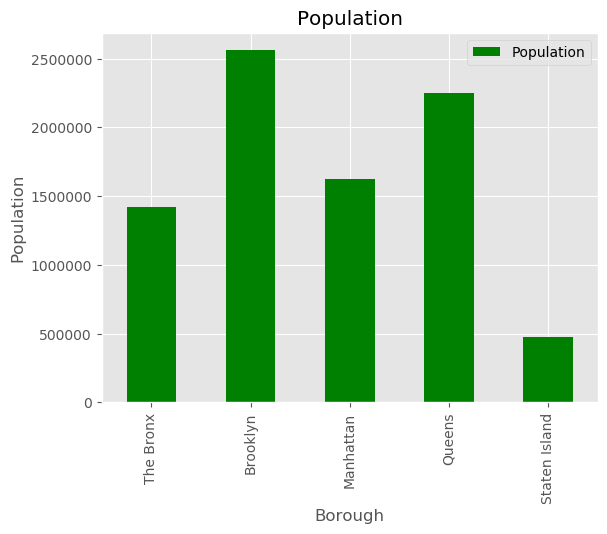

In [454]:
#New_York_df.columns = New_York_df.columns.str.replace(' ', '')
New_York_df.columns =New_York_df.columns.str.replace('\'','')
New_York_df["Population"] = New_York_df.Population.astype(float)
New_York_df.plot(x = "Borough", y="Population", kind="bar",  color='green')
plt.xlabel('Borough')
plt.ylabel('Population')
plt.title('Population')

####  The highest  Population in Brooklyn,Queens and Manhattan




###  Let us examine the Population_Density

Text(0.5, 1.0, 'Population_Density')

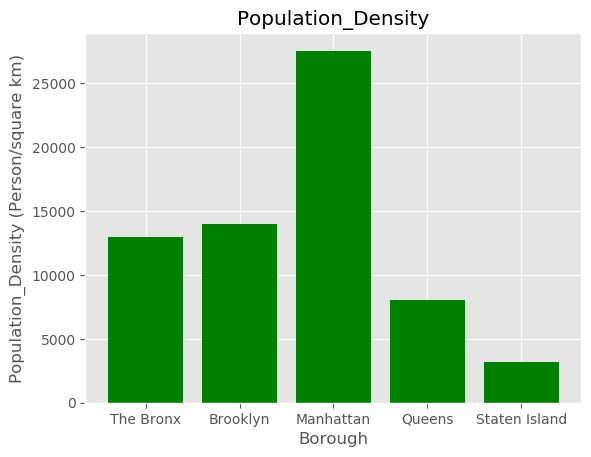

In [458]:
Population_Density=New_York_df.iloc[:, 8].tolist()
Population_Density=np.array(Population_Density,dtype=float)
plt.bar(Borough, Population_Density,  color='green')
plt.xlabel('Borough')
plt.ylabel('Population_Density (Person/square km)')
plt.title('Population_Density')

#### The highest  Population Density in Manhattan, Brooklyn and The Bronx


### Let us examine the Land area (Square km)

Text(0.5, 1.0, 'Land_area')

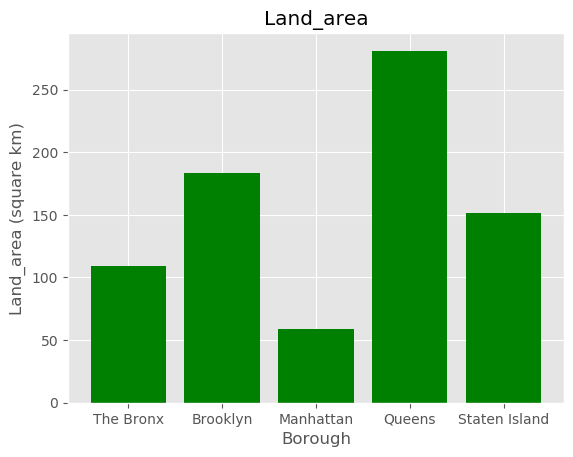

In [459]:
Land_area=New_York_df.iloc[:, 6].tolist()
Land_area=np.array(Land_area, dtype=float)
plt.bar(Borough, Land_area,  color='green')
plt.xlabel('Borough')
plt.ylabel('Land_area (square km)')
plt.title('Land_area')

#### The highest Land_area in Queens and the smallest  in Manhattan

### Let us examine the Gross Domestic Product (GDP) billions/US$

Text(0.5, 1.0, 'Gross_Domestic_Product_GDP')

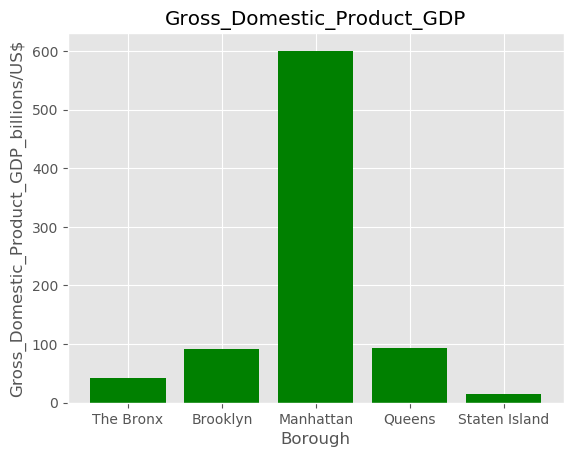

In [460]:
Gross_Domestic_Product_GDP=New_York_df.iloc[:, 3].tolist()
Gross_Domestic_Product_GDP=np.array(Gross_Domestic_Product_GDP,dtype=float)
plt.bar(Borough, Gross_Domestic_Product_GDP,  color='green')
plt.xlabel('Borough')
plt.ylabel('Gross_Domestic_Product_GDP_billions/US$')
plt.title('Gross_Domestic_Product_GDP')

#### Manhattan contributed in the highest GDP compared to all other Boroughs in New York City

# 2- Survey of the competitors in New York City 

### 2-1 List of Michelin starred restaurants in New York City Web scrapping .

In [491]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
Boroughs_New_York_City = str(soup.table)
#display_html(tab,raw=True)

<title>List of Michelin starred restaurants in New York City - Wikipedia</title>


In [492]:
New_York_Michelin_starred_restaurants_df = pd.read_html(Boroughs_New_York_City)
New_York_Michelin_starred_restaurants_df

[                                 Name Borough/County  2006(39)[3] 2007(39)[4]  \
 0                             15 East      Manhattan          NaN         NaN   
 1                     A Voce Columbus      Manhattan          NaN         NaN   
 2                      A Voce Madison      Manhattan          NaN         NaN   
 3                               Adour      Manhattan          NaN         NaN   
 4                               Agern      Manhattan          NaN         NaN   
 5                            Ai Fiori      Manhattan          NaN         NaN   
 6    Alain Ducasse at the Essex House      Manhattan          NaN  Closed[24]   
 7                               Aldea      Manhattan          NaN         NaN   
 8                    Allen & Delancey      Manhattan          NaN         NaN   
 9                                Alto      Manhattan          NaN         NaN   
 10                           Andanada      Manhattan          NaN         NaN   
 11             

In [493]:
New_York_Michelin_starred_restaurants_df=New_York_Michelin_starred_restaurants_df[0]
New_York_Michelin_starred_restaurants_df.head()

,Name,Borough/County,2006(39)[3],2007(39)[4],2008(42)[5][6],2009(42)[7][8],2010(55)[9],2011(57)[10],2012(62)[11],2013(67)[12][13],2014(67)[14],2015(73)[15],2016(76)[16],2017(77)[17],2018(72)[18],2019(76)[19],2020(76)[20]
0,15 East,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Voce Columbus,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[21],Closed[21],Closed[21],Closed[21]
2,A Voce Madison,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[22],Closed[22],Closed[22]
3,Adour,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[23],Closed[23],Closed[23],Closed[23],Closed[23],Closed[23],Closed[23]
4,Agern,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
New_York_Michelin_starred_restaurants_df.columns =['Name','Borough', '2006', '2007', '2008',  '2009', '2010', '2011','2012', '2013','2014','2015', '2016','2017','2018','2019', '2020']
New_York_Michelin_starred_restaurants_df

,Name,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,15 East,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Voce Columbus,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[21],Closed[21],Closed[21],Closed[21]
2,A Voce Madison,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[22],Closed[22],Closed[22]
3,Adour,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[23],Closed[23],Closed[23],Closed[23],Closed[23],Closed[23],Closed[23]
4,Agern,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ai Fiori,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alain Ducasse at the Essex House,Manhattan,NaN,Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24],Closed[24]
7,Aldea,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Allen & Delancey,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed[25],Closed[25],Closed[25],Closed[25],Closed[25],Closed[25],Closed[25],Closed[25]
9,Alto,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,Closed[26],Closed[26],Closed[26],Closed[26],Closed[26],Closed[26],Closed[26],Closed[26],Closed[26]


In [495]:

New_York_Michelin_starred_restaurants_df=New_York_Michelin_starred_restaurants_df.drop(New_York_Michelin_starred_restaurants_df.columns[2:16], axis=1)
New_York_Michelin_starred_restaurants_df.head()


,Name,Borough,2020
0,15 East,Manhattan,NaN
1,A Voce Columbus,Manhattan,Closed[21]
2,A Voce Madison,Manhattan,Closed[22]
3,Adour,Manhattan,Closed[23]
4,Agern,Manhattan,NaN


In [488]:
New_York_Michelin_starred_restaurants_not_closed=New_York_Michelin_starred_restaurants_df[New_York_Michelin_starred_restaurants_df['2020'].isnull()]
New_York_Michelin_starred_restaurants_not_closed

,Name,Borough,2020
0,15 East,Manhattan,NaN
4,Agern,Manhattan,NaN
5,Ai Fiori,Manhattan,NaN
7,Aldea,Manhattan,NaN
13,L'Appart,Manhattan,NaN
14,Aquavit,Manhattan,NaN
15,Aska,Brooklyn,NaN
16,L'Atelier de Joël Robuchon,Manhattan,NaN
17,Atera,Manhattan,NaN
18,Atomix,Manhattan,NaN


#### List of Michelin starred restaurants in Manhattan

In [479]:
New_York_Michelin_starred_restaurants_not_closed= New_York_Michelin_starred_restaurants_not_closed.set_index(['Borough'])
Manhattan_Michelin_starred_restaurants=New_York_Michelin_starred_restaurants_not_closed.loc['Manhattan']
Manhattan_Michelin_starred_restaurants

,Name,2020
Borough,,
Manhattan,15 East,NaN
Manhattan,Agern,NaN
Manhattan,Ai Fiori,NaN
Manhattan,Aldea,NaN
Manhattan,L'Appart,NaN
Manhattan,Aquavit,NaN
Manhattan,L'Atelier de Joël Robuchon,NaN
Manhattan,Atera,NaN
Manhattan,Atomix,NaN


In [480]:
New_York_Michelin_starred_restaurants_not_closed=New_York_Michelin_starred_restaurants_not_closed.drop(New_York_Michelin_starred_restaurants_not_closed.columns[1], axis=1)
New_York_Michelin_starred_restaurants_not_closed.head()


,Name
Borough,
Manhattan,15 East
Manhattan,Agern
Manhattan,Ai Fiori
Manhattan,Aldea
Manhattan,L'Appart


#### 2-2 Creat a List of cuisine in Manhattan borough from wikipedia pages  https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [545]:
Manhattan_Cuisine_df = [{'Borough': ' Manhattan', 'Neighborhood': 'Chinatown', 'Cuisine': 'Chinese,Vietnamese'},
         {'Borough': ' Manhattan',  'Neighborhood': 'East Harlem', 'Cuisine':'Puerto Rican, Mexican, Dominican, Chinese-Cuban,Italian'},
         {'Borough': ' Manhattan',  'Neighborhood': 'East Village',  'Cuisine': 'Japanese, Korean, Indian, Ukrainian' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Greenwich Village',  'Cuisine': 'Italian, Middle Eastern' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Harlem ',  'Cuisine': ' Italian, African-American, Latin American, West Indian, West African' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Koreatown ',  'Cuisine': 'Korean' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Nolita ',  'Cuisine': 'Australian' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Little Italy ',  'Cuisine': 'Italian' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Lower East Side ',  'Cuisine': 'Puerto Rican, Jewish, Italian, Latin American' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Murray Hill ',  'Cuisine': 'Indian, Pakistani and Bangladeshi' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Upper West Side, Manhattan ',  'Cuisine': ' Jewish, Chinese-Latino' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Washington Heights ',  'Cuisine': ' Dominican, Puerto Rican, Mexican, Jewish' },
         {'Borough': ' Manhattan',  'Neighborhood': 'Upper East Side  ',  'Cuisine': ' German, Czech, Hungarian' }]
Manhattan_Cuisine_df= pd.DataFrame(Manhattan_Cuisine_df)
Manhattan_Cuisine_df.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,"Chinese,Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian, Ukrainian"
3,Manhattan,Greenwich Village,"Italian, Middle Eastern"
4,Manhattan,Harlem,"Italian, African-American, Latin American, We..."


In [546]:
df

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,"Chinese,Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuba..."
2,Manhattan,East Village,"Japanese, Korean, Indian, Ukrainian"
3,Manhattan,Greenwich Village,"Italian, Middle Eastern"
4,Manhattan,Harlem,"Italian, African-American, Latin American, We..."
5,Manhattan,Koreatown,Korean
6,Manhattan,Nolita,Australian
7,Manhattan,Little Italy,Italian
8,Manhattan,Lower East Side,"Puerto Rican, Jewish, Italian, Latin American"
9,Manhattan,Murray Hill,"Indian, Pakistani and Bangladeshi"
